# Preprocessing Workflow


🎯  Se investigará el conjunto de datos y tomará las decisiones de preprocesamiento en consecuencia.

In [2]:
import pandas as pd

data=pd.read_csv('data-houseprice.csv')
data

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Duplicates

ℹ️ Los duplicados en los conjuntos de datos pueden provocar una fuga de datos. Es importante localizar y eliminar cualquier duplicado sin sentido

❓ ¿Cuántas filas duplicadas hay en el conjunto de datos? 

In [3]:
#len(data)
duplicate_count=len(data)-len(data.drop_duplicates())
duplicate_count

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1760 entries, 0 to 1759
Data columns (total 85 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1760 non-null   int64  
 1   MSSubClass     1760 non-null   int64  
 2   MSZoning       1760 non-null   object 
 3   LotFrontage    1451 non-null   float64
 4   LotArea        1760 non-null   int64  
 5   Street         1760 non-null   object 
 6   Alley          112 non-null    object 
 7   LotShape       1760 non-null   object 
 8   LandContour    1760 non-null   object 
 9   Utilities      1760 non-null   object 
 10  LotConfig      1760 non-null   object 
 11  LandSlope      1760 non-null   object 
 12  Neighborhood   1760 non-null   object 
 13  Condition1     1760 non-null   object 
 14  Condition2     1760 non-null   object 
 15  BldgType       1760 non-null   object 
 16  HouseStyle     1760 non-null   object 
 17  OverallQual    1760 non-null   int64  
 18  OverallC

👇 elminando los datos duplicado y sobresescribiendo`.

In [ ]:
data.drop_duplicates(inplace=True)

# Missing data

👇 conocer el porcentaje de valores perdidos

In [ ]:
# YOUR CODE HERE
data.isnull().sum().sort_values(ascending=False)/len(data)

WallMat        0.996575
PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
                 ...   
ExterQual      0.000000
Exterior2nd    0.000000
Exterior1st    0.000000
RoofMatl       0.000000
SalePrice      0.000000
Length: 85, dtype: float64

## `GarageFinish`

De acuerdo con la descripción del conjunto de datos, los valores faltantes en `GarageFinish` representan una casa que no tiene garaje. Deben estar codificados como tales

In [ ]:

data['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [ ]:
data['GarageFinish'].value_counts().sum()

1379

In [ ]:
len(data['GarageFinish'])

1460

In [ ]:
data['GarageFinish'].isnull().sum()

81

In [ ]:
import numpy as np

(data.GarageFinish.isnull().sum()/len(data))*100 #Percentage of missing values in Alley



5.5479452054794525

In [ ]:
#data.GarageFinish.replace(np.nan, "No Garage", inplace=True) #Replace NaN by "NoAlley"

data.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [ ]:
data.dropna(subset=['GarageFinish'],inplace=True)

## `RoofSurface`

ℹ️ `RoofSurface` tiene algunos valores faltantes que pueden ser imputados por el valor mediano.

In [ ]:

data['RoofSurface'].unique()

array([1995.,  874., 1593., ..., 2645.,  722., 3501.])

In [ ]:
data['RoofSurface']

0       1995.0
1        874.0
2       1593.0
3       2566.0
4       3130.0
         ...  
1455    1698.0
1456    2645.0
1457     722.0
1458    3501.0
1459    3082.0
Name: RoofSurface, Length: 1379, dtype: float64

In [ ]:
data['RoofSurface'].sort_values()

76     558.0
73     563.0
261    565.0
573    570.0
58     571.0
       ...  
232      NaN
262      NaN
292      NaN
311      NaN
312      NaN
Name: RoofSurface, Length: 1379, dtype: float64

In [ ]:
data['RoofSurface'].value_counts()

3817.0    5
1847.0    3
2420.0    3
1709.0    3
3112.0    3
         ..
3174.0    1
1715.0    1
4676.0    1
3088.0    1
3501.0    1
Name: RoofSurface, Length: 1195, dtype: int64

In [ ]:
data['RoofSurface'].shape

(1379,)

In [ ]:
data['RoofSurface'].isnull().sum()


9

In [ ]:
data['RoofSurface'].mean()

2885.597810218978

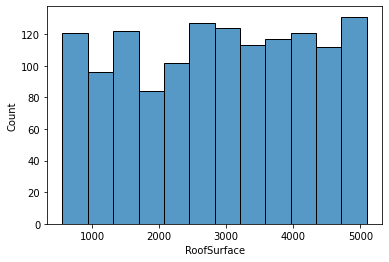

In [ ]:
import seaborn as sns
sns.histplot(data['RoofSurface'],bins='auto');

<AxesSubplot:ylabel='RoofSurface'>

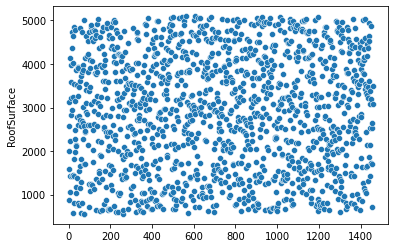

In [ ]:
sns.scatterplot(data=data['RoofSurface'])

<AxesSubplot:>

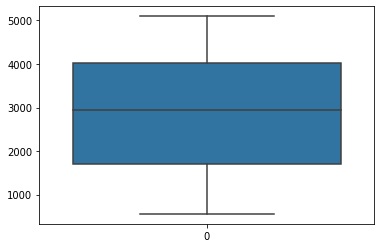

In [ ]:
sns.boxplot(data=data['RoofSurface'])

👇Cuando haya terminado, imprima el porcentaje de valores perdidos para todo el marco de datos.

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean") # Instanciate a SimpleImputer object with strategy of choice

imputer.fit(data[['RoofSurface']]) # Call the "fit" method on the object

data['RoofSurface'] = imputer.transform(data[['RoofSurface']]) # Call the "transform" method on the object

imputer.statistics_ # The mean is stored in the transformer's memory

array([2885.59781022])

⚠️ Tener cuidado: no todos los valores faltantes se representan np.nans, y el isnull () de Python solo detecta np.nans ⚠️

## `ChimneyStyle`

`ChimneyStyle` tiene muchos valores perdidos. La descripción no toca lo que representan. Como tal, es mejor no hacer suposiciones y descartar la columna por completo.

In [ ]:
# YOUR CODE HERE
data['ChimneyStyle'].unique()

array(['bricks', 'castiron', '?'], dtype=object)

In [ ]:
data['ChimneyStyle'].value_counts()

?           1374
bricks         3
castiron       2
Name: ChimneyStyle, dtype: int64

In [ ]:
data.drop(['ChimneyStyle'], axis=1, inplace = True)

# Scaling

##  `RoofSurface` 

In [ ]:
# YOUR CODE HERE
data['RoofSurface'].unique()

array([1995.,  874., 1593., ..., 2645.,  722., 3501.])

ℹ️ Dado que `RoofSurface` no parece tener una distribución normal, es mejor escalar MinMax.

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


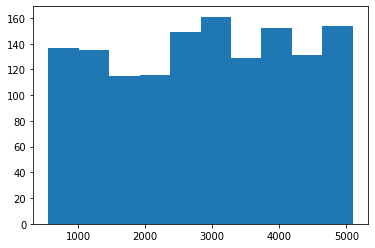

In [ ]:
# YOUR CODE HERE
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

plt.hist(data['RoofSurface']) # Check feature distribution

scaler = MinMaxScaler() # Instanciate StandarScaler

scaler.fit(data[['RoofSurface']]) # Fit scaler to data

data['RoofSurface'] = scaler.transform(data[['RoofSurface']]) # Use scaler to transform data
data.head()

## `GrLivArea`

In [ ]:
# YOUR CODE HERE
data['GrLivArea'].nunique()

832

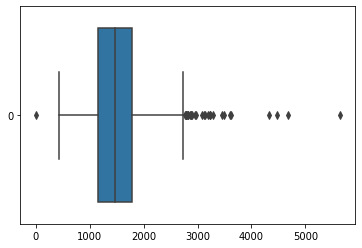

In [ ]:
sns.boxplot(data=data['GrLivArea'],orient='h');

ℹ️ 💡 `GrLivArea` tiene una distribución normal y algunos valores atípicos. Debe tener una escala robusta.

In [ ]:
# YOUR CODE HERE
from sklearn.preprocessing import RobustScaler

r_scaler = RobustScaler() # Instanciate Robust Scaler

r_scaler.fit(data[['GrLivArea']]) # Fit scaler to feature

data['GrLivArea'] = r_scaler.transform(data[['GrLivArea']]) #Scale

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## `BedroomAbvGr` ,  `OverallCond` & `KitchenAbvGr`

ℹ️ `BedroomAbvGr`,` OverallCond` y `KitchenAbvGr` son características ordinales que se pueden escalar MinMax.

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


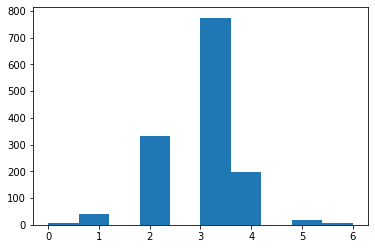

In [ ]:
# YOUR CODE HERE# YOUR CODE HERE
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

plt.hist(data['BedroomAbvGr']) # Check feature distribution

scaler = MinMaxScaler() # Instanciate StandarScaler

scaler.fit(data[['BedroomAbvGr','OverallCond','KitchenAbvGr']]) # Fit scaler to data

data[['BedroomAbvGr','OverallCond','KitchenAbvGr']] = scaler.transform(data[['BedroomAbvGr','OverallCond','KitchenAbvGr']]) # Use scaler to transform data
data.head()

# Feature Engineering

## `GarageFinish`

<details>
    <summary>💡 Hint</summary>
ℹ️ `GarageFinish` is a multicategorical feature that must be One hot encoded.
</details>

ℹ️ `GarageFinish` es una función de varias categorías que debe tener una codificación en caliente.

In [ ]:
# YOUR CODE HERE
data['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

data.GarageFinish.unique()  # Check unique values for streets (3)

ohe = OneHotEncoder(sparse = False) # Instanciate encoder

ohe.fit(data[['GarageFinish']]) # Fit encoder

GarageFinish_encoded = ohe.transform(data[['GarageFinish']]) # Encode alley

data["RFn"],data["Unf"],data['Fin']= GarageFinish_encoded.T # Transpose encoded Alley back into dataframe

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,RFn,Unf,Fin
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500,0.0,1.0,0.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500,0.0,1.0,0.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500,0.0,1.0,0.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000,0.0,0.0,1.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000,0.0,1.0,0.0


## Encoding  `CentralAir`

ℹ️ `CentralAir` es una característica categórica binaria.

In [ ]:
# YOUR CODE HERE
data['CentralAir'].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

data.CentralAir.unique()  # Check unique values for streets (3)

le = LabelEncoder() # Instanciate encoder

le.fit(data[['CentralAir']]) # Fit encoder

CentralAir_encoded = le.transform(data[['CentralAir']]) # Encode alley

data['CentralAir'] = CentralAir_encoded # Transpose encoded Alley back into dataframe

data.head()

/home/jpr/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,RFn,Unf,Fin
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500,0.0,1.0,0.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500,0.0,1.0,0.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500,0.0,1.0,0.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000,0.0,0.0,1.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000,0.0,1.0,0.0


In [ ]:
CentralAir_encoded

array([1, 1, 1, ..., 1, 1, 1])

## `MoSold` - Cyclical engineering 

Agreguemos dos nuevas columnas a su marco de datos, sin_MoSold y cos_MoSold, que contienen el seno y el coseno de la columna MoSold respectivamente. Una vez que se agregan estas columnas, podemos eliminar la columna MoSold original.

In [ ]:
# YOUR CODE HERE
moths_in_anio = 12

data['sin_MoSold'] = np.sin(2*np.pi*data[['MoSold']]/moths_in_anio)
data['cos_MoSold'] = np.cos(2*np.pi*data[['MoSold']]/moths_in_anio)

data.drop('MoSold', axis=1, inplace=True)

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,YrSold,SaleType,SaleCondition,SalePrice,RFn,Unf,Fin,sin_MoSold,cos_MoSold
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,2008,WD,Normal,208500,0.0,1.0,0.0,8.660254e-01,5.000000e-01
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,2007,WD,Normal,181500,0.0,1.0,0.0,5.000000e-01,-8.660254e-01
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,2008,WD,Normal,223500,0.0,1.0,0.0,-1.000000e+00,-1.836970e-16
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,2006,WD,Abnorml,140000,0.0,0.0,1.0,8.660254e-01,5.000000e-01
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,2008,WD,Normal,250000,0.0,1.0,0.0,-2.449294e-16,1.000000e+00


# 🏁